<h1 data-start="71" data-end="110">Pandas: Data Preparation and Analysis</h1>
<p data-start="135" data-end="219">This notebook demonstrates a basic <strong data-start="170" data-end="187">data workflow</strong> using the <strong data-start="198" data-end="208">pandas</strong> library:</p>
<ol data-start="221" data-end="688">
<li data-start="221" data-end="248">
<p data-start="224" data-end="248">Installation / Imports</p>
</li>
<li data-start="249" data-end="289">
<p data-start="252" data-end="289">Creating and preparing example data</p>
</li>
<li data-start="290" data-end="316">
<p data-start="293" data-end="316">Data loading / export</p>
</li>

<li data-start="317" data-end="362">
<p data-start="320" data-end="362">Data inspection and quality verification</p>
</li>
<li data-start="363" data-end="402">
<p data-start="366" data-end="402">Cleaning / handling missing values</p>
</li>
<li data-start="403" data-end="441">
<p data-start="406" data-end="441">Filtering / selection and sorting</p>
</li>
<li data-start="442" data-end="485">
<p data-start="445" data-end="485">Transformations (creating new columns)</p>
</li>
<li data-start="486" data-end="516">
<p data-start="489" data-end="516">Grouping and aggregations</p>
</li>
<li data-start="517" data-end="564">
<p data-start="520" data-end="564">Joining tables (<code data-start="536" data-end="543">merge</code>, <code data-start="545" data-end="553">concat</code>, <code data-start="555" data-end="561">join</code>)</p>
</li>
<li data-start="565" data-end="639">
<p data-start="569" data-end="639">Reshaping: <strong data-start="580" data-end="595">long &harr; wide</strong> (<code data-start="597" data-end="604">pivot</code>, <code data-start="606" data-end="619">pivot_table</code>, <code data-start="621" data-end="627">melt</code>, <code data-start="629" data-end="636">stack</code>)</p>
</li>
<li data-start="640" data-end="667">
<p data-start="644" data-end="667">Simple visualizations</p>
</li>
<li data-start="668" data-end="688">
<p data-start="672" data-end="688">Saving results</p>
</li>
</ol>

<h2 data-start="48" data-end="80">1. Installation and Imports</h2>
<p data-start="81" data-end="186" data-is-last-node="" data-is-only-node="">If you don&rsquo;t have the required packages installed, uncomment the first lines with <code data-start="163" data-end="168">pip</code> and run the cell.</p>

In [1]:
# !pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'2.3.3'

<h2 data-start="48" data-end="67">2. Sample Data</h2>
<p data-start="68" data-end="137">For the purpose of these exercises, we&rsquo;ll create three data frames:</p>
<ul data-start="138" data-end="261" data-is-last-node="" data-is-only-node="">
<li data-start="138" data-end="180">
<p data-start="140" data-end="180"><code data-start="140" data-end="151">customers</code> &ndash; metadata about customers</p>
</li>
<li data-start="181" data-end="227">
<p data-start="183" data-end="227"><code data-start="183" data-end="191">orders</code> &ndash; record of orders (transactions)</p>
</li>
<li data-start="228" data-end="261" data-is-last-node="">
<p data-start="230" data-end="261" data-is-last-node=""><code data-start="230" data-end="240">products</code> &ndash; product dictionary</p>
</li>
</ul>

In [2]:
import pandas as pd
import numpy as np

customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'first_name': ['Ala', 'Bartek', 'Celina', 'Daniel', 'Ela'],
    'country': ['PL', 'PL', 'DE', 'CZ', 'PL'],
    'age': [25, np.nan, 31, 29, 22]
})

orders = pd.DataFrame({
    'order_id': ['O-101', 'O-102', 'O-103', 'O-104', 'O-105', 'O-106', 'O-107'],
    'customer_id': [1, 2, 2, 3, 3, 3, 5],
    'product_id': ['P1', 'P2', 'P3', 'P2', 'P2', 'P4', 'P1'],
    'date': pd.to_datetime(['2024-01-10', '2024-01-15', '2024-02-03', '2024-01-12', '2024-02-20', '2024-03-03', '2024-01-25']),
    'quantity': [1, 2, 1, 3, 1, 2, 1],
    'unit_price': [120.0, 80.0, 45.0, 80.0, 80.0, 200.0, 120.0]
})

products = pd.DataFrame({
    'product_id': ['P1', 'P2', 'P3', 'P4'],
    'category': ['Electronics', 'Home Appliances', 'Home Appliances', 'Electronics'],
    'name': ['Headphones', 'Kettle', 'Toaster', 'Monitor']
})

customers, orders.head(), products


(   customer_id first_name country   age
 0            1        Ala      PL  25.0
 1            2     Bartek      PL   NaN
 2            3     Celina      DE  31.0
 3            4     Daniel      CZ  29.0
 4            5        Ela      PL  22.0,
   order_id  customer_id product_id       date  quantity  unit_price
 0    O-101            1         P1 2024-01-10         1       120.0
 1    O-102            2         P2 2024-01-15         2        80.0
 2    O-103            2         P3 2024-02-03         1        45.0
 3    O-104            3         P2 2024-01-12         3        80.0
 4    O-105            3         P2 2024-02-20         1        80.0,
   product_id         category        name
 0         P1      Electronics  Headphones
 1         P2  Home Appliances      Kettle
 2         P3  Home Appliances     Toaster
 3         P4      Electronics     Monitor)

### 3. Data Inspection

In [4]:
print("Customers:")
display(customers.info())
display(customers.describe(include='all'))

print("\nOrders:")
display(orders.info())
display(orders.describe(include='all'))


Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5 non-null      int64  
 1   first_name   5 non-null      object 
 2   country      5 non-null      object 
 3   age          4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


None

,customer_id,first_name,country,age
count,5.000000,5,5,4.000000
unique,NaN,5,3,NaN
top,NaN,Ala,PL,NaN
freq,NaN,1,3,NaN
mean,3.000000,NaN,NaN,26.750000
std,1.581139,NaN,NaN,4.031129
min,1.000000,NaN,NaN,22.000000
25%,2.000000,NaN,NaN,24.250000
50%,3.000000,NaN,NaN,27.000000
75%,4.000000,NaN,NaN,29.500000



Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     7 non-null      object        
 1   customer_id  7 non-null      int64         
 2   product_id   7 non-null      object        
 3   date         7 non-null      datetime64[ns]
 4   quantity     7 non-null      int64         
 5   unit_price   7 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 468.0+ bytes


None

,order_id,customer_id,product_id,date,quantity,unit_price
count,7,7.000000,7,7,7.000000,7.000000
unique,7,NaN,4,NaN,NaN,NaN
top,O-101,NaN,P2,NaN,NaN,NaN
freq,1,NaN,3,NaN,NaN,NaN
mean,NaN,2.714286,NaN,2024-01-30 00:00:00,1.571429,103.571429
min,NaN,1.000000,NaN,2024-01-10 00:00:00,1.000000,45.000000
25%,NaN,2.000000,NaN,2024-01-13 12:00:00,1.000000,80.000000
50%,NaN,3.000000,NaN,2024-01-25 00:00:00,1.000000,80.000000
75%,NaN,3.000000,NaN,2024-02-11 12:00:00,2.000000,120.000000
max,NaN,5.000000,NaN,2024-03-03 00:00:00,3.000000,200.000000


## 4. Missing Data and Cleaning

In [4]:
# Count missing values
customers.isna().sum()


customer_id    0
first_name     0
country        0
age            1
dtype: int64

In [14]:
# Fill missing age values with the median (example)
customers['age'] = customers['age'].fillna(customers['age'].median())
customers


,customer_id,first_name,country,age
0,1,Ala,PL,25.0
1,2,Bartek,PL,27.0
2,3,Celina,DE,31.0
3,4,Daniel,CZ,29.0
4,5,Ela,PL,22.0


### 5. Filtering, Selection, and Sorting

In [5]:
print(customers)
# Customers from Poland, sorted by age in descending order
customers_pl = customers.query("country == 'PL' &  first_name == 'Ela'").sort_values('age', ascending=True )
customers_pl

customers_pl = customers[ (customers["country"]== 'PL') & (customers["first_name"]== 'Ela') ].sort_values('age', ascending=True)
customers_pl


   customer_id first_name country   age
0            1        Ala      PL  25.0
1            2     Bartek      PL   NaN
2            3     Celina      DE  31.0
3            4     Daniel      CZ  29.0
4            5        Ela      PL  22.0


,customer_id,first_name,country,age
4,5,Ela,PL,22.0


In [27]:
orders

,order_id,customer_id,product_id,date,quantity,unit_price
0,O-101,1,P1,2024-01-10,1,120.0
1,O-102,2,P2,2024-01-15,2,80.0
2,O-103,2,P3,2024-02-03,1,45.0
3,O-104,3,P2,2024-01-12,3,80.0
4,O-105,3,P2,2024-02-20,1,80.0
5,O-106,3,P4,2024-03-03,2,200.0
6,O-107,5,P1,2024-01-25,1,120.0


### 6. New Columns and Transformations

In [6]:
# Order value

orders['value'] = orders['quantity'] * orders['unit_price']
orders[['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'value']].head()


,order_id,customer_id,product_id,quantity,unit_price,value
0,O-101,1,P1,1,120.0,120.0
1,O-102,2,P2,2,80.0,160.0
2,O-103,2,P3,1,45.0,45.0
3,O-104,3,P2,3,80.0,240.0
4,O-105,3,P2,1,80.0,80.0


## 7. Grouping and Aggregations

In [11]:
# Total order value per customer
print(orders)

sales_by_customer = (
    orders
    .groupby('customer_id', as_index=False)
    .agg(total_value=('value', 'sum'), order_count=('order_id', 'count'))
)
sales_by_customer


  order_id  customer_id product_id       date  quantity  unit_price  value
0    O-101            1         P1 2024-01-10         1       120.0  120.0
1    O-102            2         P2 2024-01-15         2        80.0  160.0
2    O-103            2         P3 2024-02-03         1        45.0   45.0
3    O-104            3         P2 2024-01-12         3        80.0  240.0
4    O-105            3         P2 2024-02-20         1        80.0   80.0
5    O-106            3         P4 2024-03-03         2       200.0  400.0
6    O-107            5         P1 2024-01-25         1       120.0  120.0


,customer_id,total_value,order_count
0,1,120.0,1
1,2,205.0,2
2,3,720.0,3
3,5,120.0,1


<h1>8. Merging Tables (<code data-start="73" data-end="80">merge</code>, <code data-start="82" data-end="88">join</code>, <code data-start="90" data-end="98">concat</code>)</h1>

In [7]:
# Merge orders with products
print(orders)
print(products)
op = orders.merge(products, on='product_id', how='left')
op



  order_id  customer_id product_id       date  quantity  unit_price  value
0    O-101            1         P1 2024-01-10         1       120.0  120.0
1    O-102            2         P2 2024-01-15         2        80.0  160.0
2    O-103            2         P3 2024-02-03         1        45.0   45.0
3    O-104            3         P2 2024-01-12         3        80.0  240.0
4    O-105            3         P2 2024-02-20         1        80.0   80.0
5    O-106            3         P4 2024-03-03         2       200.0  400.0
6    O-107            5         P1 2024-01-25         1       120.0  120.0
  product_id         category        name
0         P1      Electronics  Headphones
1         P2  Home Appliances      Kettle
2         P3  Home Appliances     Toaster
3         P4      Electronics     Monitor


,order_id,customer_id,product_id,date,quantity,unit_price,value,category,name
0,O-101,1,P1,2024-01-10,1,120.0,120.0,Electronics,Headphones
1,O-102,2,P2,2024-01-15,2,80.0,160.0,Home Appliances,Kettle
2,O-103,2,P3,2024-02-03,1,45.0,45.0,Home Appliances,Toaster
3,O-104,3,P2,2024-01-12,3,80.0,240.0,Home Appliances,Kettle
4,O-105,3,P2,2024-02-20,1,80.0,80.0,Home Appliances,Kettle
5,O-106,3,P4,2024-03-03,2,200.0,400.0,Electronics,Monitor
6,O-107,5,P1,2024-01-25,1,120.0,120.0,Electronics,Headphones


In [30]:
# Merge with customers
opc = op.merge(customers, on='customer_id', how='left')
opc
# opc[['order_id', 'first_name', 'country', 'name', 'category', 'value']].head()


,order_id,customer_id,product_id,date,quantity,unit_price,category,name,first_name,country,age
0,O-101,1,P1,2024-01-10,1,120.0,Electronics,Headphones,Ala,PL,25.0
1,O-102,2,P2,2024-01-15,2,80.0,Home Appliances,Kettle,Bartek,PL,27.0
2,O-103,2,P3,2024-02-03,1,45.0,Home Appliances,Toaster,Bartek,PL,27.0
3,O-104,3,P2,2024-01-12,3,80.0,Home Appliances,Kettle,Celina,DE,31.0
4,O-105,3,P2,2024-02-20,1,80.0,Home Appliances,Kettle,Celina,DE,31.0
5,O-106,3,P4,2024-03-03,2,200.0,Electronics,Monitor,Celina,DE,31.0
6,O-107,5,P1,2024-01-25,1,120.0,Electronics,Headphones,Ela,PL,22.0


In [ ]:
# concat – combining data frames by rows
p1 = orders.iloc[:3]
p2 = orders.iloc[3:]
p2["col4"] = [1,2,3,4]
# print(orders)
print("-----")
print(p1)
print("-----")
print(p2)
print("-----")
print(pd.concat([p1, p2], ignore_index=False))
print(pd.concat([p1, p2], ignore_index=False).equals(orders))
# pd.concat([p1, p2], ignore_index=True)

-----
  order_id  customer_id product_id       date  quantity  unit_price  value
0    O-101            1         P1 2024-01-10         1       120.0  120.0
1    O-102            2         P2 2024-01-15         2        80.0  160.0
2    O-103            2         P3 2024-02-03         1        45.0   45.0
-----
  order_id  customer_id product_id       date  quantity  unit_price  value
3    O-104            3         P2 2024-01-12         3        80.0  240.0
4    O-105            3         P2 2024-02-20         1        80.0   80.0
5    O-106            3         P4 2024-03-03         2       200.0  400.0
6    O-107            5         P1 2024-01-25         1       120.0  120.0
-----
  order_id  customer_id product_id       date  quantity  unit_price  value
0    O-101            1         P1 2024-01-10         1       120.0  120.0
1    O-102            2         P2 2024-01-15         2        80.0  160.0
2    O-103            2         P3 2024-02-03         1        45.0   45.0
3    O-

## 9. LONG ↔ WIDE (pivot/melt, unstack/stack)

In [48]:
# LONG -> WIDE: sales value per month per customer
# print(orders)
daily = orders.assign(month=orders['date'].dt.strftime('%m'))
# orders['month'] = orders['date'].dt.strftime('%m')
print(daily)
# daily
wide = (
    daily.pivot_table(index='customer_id', columns='month', values='value', aggfunc='sum')
         .fillna(0)
         .reset_index()
         
)
# wide.columns.name = None
wide


  order_id  customer_id product_id       date  quantity  unit_price  value  \
0    O-101            1         P1 2024-01-10         1       120.0  120.0   
1    O-102            2         P2 2024-01-15         2        80.0  160.0   
2    O-103            2         P3 2024-02-03         1        45.0   45.0   
3    O-104            3         P2 2024-01-12         3        80.0  240.0   
4    O-105            3         P2 2024-02-20         1        80.0   80.0   
5    O-106            3         P4 2024-03-03         2       200.0  400.0   
6    O-107            5         P1 2024-01-25         1       120.0  120.0   

  month  
0    01  
1    01  
2    02  
3    01  
4    02  
5    03  
6    01  


month,customer_id,01,02,03
0,1,120.0,0.0,0.0
1,2,160.0,45.0,0.0
2,3,240.0,80.0,400.0
3,5,120.0,0.0,0.0


In [50]:
# WIDE -> LONG: melt
print(wide)
long2 = (
    wide.melt(id_vars=['customer_id'], var_name='month', value_name='value')
        .sort_values(['customer_id', 'month'])
)
long2.head(9)


month  customer_id     01    02     03
0                1  120.0   0.0    0.0
1                2  160.0  45.0    0.0
2                3  240.0  80.0  400.0
3                5  120.0   0.0    0.0


,customer_id,month,value
0,1,01,120.0
4,1,02,0.0
8,1,03,0.0
1,2,01,160.0
5,2,02,45.0
9,2,03,0.0
2,3,01,240.0
6,3,02,80.0
10,3,03,400.0


### 10. Simple Visualizations
Note: In this section, we use plain matplotlib as required.

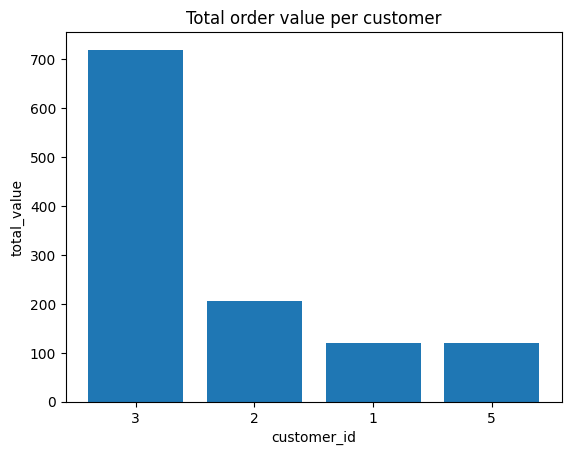

In [18]:
# Top customers by total order value
ranking = sales_by_customer.sort_values('total_value', ascending=False)
plt.figure()
plt.bar(ranking['customer_id'].astype(str), ranking['total_value'])
plt.title('Total order value per customer')
plt.xlabel('customer_id')
plt.ylabel('total_value')
plt.show()


<h2 data-start="60" data-end="83">11. Saving Results</h2>
<p data-start="84" data-end="167" data-is-last-node="" data-is-only-node="">Let&rsquo;s save the processed tables to CSV files (in the notebook&rsquo;s working directory).</p>

In [21]:
import os 
out_dir = 'results'
os.makedirs(out_dir, exist_ok=True)
customers.to_csv(os.path.join(out_dir, 'klienci.csv'), index=False)
orders.to_csv(os.path.join(out_dir, 'zamowienia.csv'), index=False)
products.to_csv(os.path.join(out_dir, 'produkty.csv'), index=False)
wide.to_csv(os.path.join(out_dir, 'sprzedaz_wide.csv'), index=False)
long2.to_csv(os.path.join(out_dir, 'sprzedaz_long.csv'), index=False)
sorted(os.listdir(out_dir))


['.ipynb_checkpoints',
 'klienci.csv',
 'produkty.csv',
 'sprzedaz_long.csv',
 'sprzedaz_wide.csv',
 'zamowienia.csv']

<h2 data-start="51" data-end="74">12. Optional Tasks</h2>
<ol data-start="76" data-end="382" data-is-last-node="" data-is-only-node="">
<li data-start="76" data-end="144">
<p data-start="79" data-end="144">Calculate the <strong data-start="93" data-end="141">average value of a single order per customer</strong>.</p>
</li>
<li data-start="145" data-end="199">
<p data-start="148" data-end="199">Find the <strong data-start="157" data-end="175">top 3 products</strong> by total sales value.</p>
</li>
<li data-start="200" data-end="300">
<p data-start="203" data-end="300">Build a <strong data-start="211" data-end="225">wide table</strong> with columns = product categories and values = total sales per customer.</p>
</li>
<li data-start="301" data-end="382" data-is-last-node="">
<p data-start="304" data-end="382" data-is-last-node=""><strong data-start="304" data-end="348">Sum monthly sales per customer&rsquo;s country</strong> (after merging with <code data-start="369" data-end="380">customers</code>).</p>
</li>
</ol>

### Data analysis of WB_WDI_WIDEF.csv – World Development Indicators (WDI)


In [51]:
import pandas as pd

years = [str(y) for y in range(1961, 2025)]
print(years)
usecols = [
    "REF_AREA", "REF_AREA_LABEL",
    "INDICATOR", "INDICATOR_LABEL",
    "UNIT_MEASURE", "UNIT_MEASURE_LABEL",
] + years

data = pd.read_csv("WB_WDI_WIDEF.csv", usecols=usecols)

print(len(data["REF_AREA_LABEL"].unique())) # number of countries 
 
print(len(data["INDICATOR"].unique()))      # number variables  
data.info()


['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
265
1445
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287507 entries, 0 to 287506
Data columns (total 70 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REF_AREA            287507 non-null  object 
 1   REF_AREA_LABEL      287507 non-null  object 
 2   INDICATOR           287507 non-null  object 
 3   INDICATOR_LABEL     287507 non-null  object 
 4   UNIT_MEASURE        287507 non-null  object 
 5   UNIT_MEASURE

In [22]:
data.head()

,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,1961,1962,1963,1964,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ABW,Aruba,WB_WDI_AG_CON_FERT_ZS,Fertilizer consumption (kilograms per hectare ...,KG_HA,Kilogram per hectare,NaN,NaN,NaN,NaN,...,3.185000,2.710000,2.485000,1.375000,17.270000,13.195000,15.920000,15.925000,NaN,NaN
1,ABW,Aruba,WB_WDI_AG_LND_AGRI_K2,Agricultural land (sq. km),KM2,Square kilometers,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,NaN,NaN,NaN
2,ABW,Aruba,WB_WDI_AG_LND_AGRI_ZS,Agricultural land (% of land area),PT_LAR,Percentage of land area,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
3,ABW,Aruba,WB_WDI_AG_LND_ARBL_HA,Arable land (hectares),HA,Hectares,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,NaN,NaN,NaN
4,ABW,Aruba,WB_WDI_AG_LND_ARBL_HA_PC,Arable land (hectares per person),HA_PS,Hectares per person,0.035985,0.035511,0.035086,0.034711,...,0.018535,0.018395,0.018393,0.018364,0.018315,0.018418,0.018570,NaN,NaN,NaN


In [4]:
# Filter for the indicator: Employment to population ratio, 15+, female (%) (national estimate)
data = data[data["INDICATOR_LABEL"] == "Employment to population ratio, 15+, female (%) (national estimate)"]

data.head()

,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,UNIT_MEASURE,UNIT_MEASURE_LABEL,1961,1962,1963,1964,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
492,ABW,Aruba,WB_WDI_SL_EMP_TOTL_SP_FE_NE_ZS,"Employment to population ratio, 15+, female (%...",PT,Percentage,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2437,AFG,Afghanistan,WB_WDI_SL_EMP_TOTL_SP_FE_NE_ZS,"Employment to population ratio, 15+, female (%...",PT,Percentage,NaN,NaN,NaN,NaN,...,NaN,NaN,18.202,NaN,NaN,13.730,22.014,NaN,NaN,NaN
3295,AFW,Africa Western and Central,WB_WDI_SL_EMP_TOTL_SP_FE_NE_ZS,"Employment to population ratio, 15+, female (%...",PT,Percentage,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49.049845,NaN,NaN,66.670345,NaN,NaN
4569,AGO,Angola,WB_WDI_SL_EMP_TOTL_SP_FE_NE_ZS,"Employment to population ratio, 15+, female (%...",PT,Percentage,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.942000,NaN,62.932,63.378000,NaN,NaN
5942,ALB,Albania,WB_WDI_SL_EMP_TOTL_SP_FE_NE_ZS,"Employment to population ratio, 15+, female (%...",PT,Percentage,NaN,NaN,NaN,NaN,...,38.983,42.536,43.369,45.223,46.891000,46.022,46.344,50.059000,51.597,NaN


# Change the data format from wide to long

In [53]:
data_long = data.melt(
    id_vars=["REF_AREA", 
             "REF_AREA_LABEL", 
             "INDICATOR_LABEL", 
             "UNIT_MEASURE_LABEL"
             ],
    value_vars=years,
    var_name="Year",
    value_name="Value"
)

# Convert year to numeric (optional)
data_long["Year"] = data_long["Year"].astype(int)

data_long.head()

,REF_AREA,REF_AREA_LABEL,INDICATOR_LABEL,UNIT_MEASURE_LABEL,Year,Value
0,ABW,Aruba,Fertilizer consumption (kilograms per hectare ...,Kilogram per hectare,1961,NaN
1,ABW,Aruba,Agricultural land (sq. km),Square kilometers,1961,20.000000
2,ABW,Aruba,Agricultural land (% of land area),Percentage of land area,1961,11.111111
3,ABW,Aruba,Arable land (hectares),Hectares,1961,2000.000000
4,ABW,Aruba,Arable land (hectares per person),Hectares per person,1961,0.035985


# Percentage of missing data for each country

In [25]:
# Procent brakujcych danych dla każdego kraju dla zmiennej Employment to population ratio, 15+, female (%) (national estimate)
missing_percent = (
    data_long.groupby("REF_AREA_LABEL")["Value"]
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index(name="PercentMissing")
)
missing_percent 

,REF_AREA_LABEL,PercentMissing
0,Afghanistan,90.6250
1,Africa Western and Central,96.8750
2,Albania,68.7500
3,Algeria,87.5000
4,American Samoa,98.4375
...,...,...
234,West Bank and Gaza,64.0625
235,World,96.8750
236,"Yemen, Rep.",85.9375
237,Zambia,79.6875


# Average value for each country – Employment to population ratio, 15+, female (%) (national estimate)

In [26]:
average_value = (
    data_long.groupby("REF_AREA_LABEL")["Value"]
    .apply(lambda x: x.mean())
    .reset_index(name="Average")
)
average_value


,REF_AREA_LABEL,Average
0,Afghanistan,22.572667
1,Africa Western and Central,57.860095
2,Albania,42.271500
3,Algeria,10.424875
4,American Samoa,40.330000
...,...,...
234,West Bank and Gaza,10.846043
235,World,44.405240
236,"Yemen, Rep.",7.190000
237,Zambia,46.931462


# Average Employment to population ratio, 15+, female (%) (national estimate) for Poland

In [28]:
average_value[average_value["REF_AREA_LABEL"] =="Poland"]

,REF_AREA_LABEL,Average
179,Poland,44.993094


In [29]:
# All Employment to population ratio, 15+, female (%) (national estimate) values for Poland
data_long[data_long["REF_AREA_LABEL"] == "Poland"]


,REF_AREA,REF_AREA_LABEL,INDICATOR_LABEL,UNIT_MEASURE_LABEL,Year,Value
174,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,1961,NaN
413,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,1962,NaN
652,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,1963,NaN
891,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,1964,NaN
1130,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,1965,NaN
...,...,...,...,...,...,...
14275,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,2020,46.761
14514,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,2021,48.922
14753,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,2022,49.730
14992,POL,Poland,"Employment to population ratio, 15+, female (%...",Percentage,2023,50.523


# Basic statistics for Employment to population ratio, 15+, female (%) (national estimate)

In [54]:
summary = (
    data_long.groupby("REF_AREA_LABEL")
    .agg(
        N=("Value", "size"),
        Missing=("Value", lambda x: x.isna().sum()),
        Valid=("Value", lambda x: x.notna().sum()),
        Mean=("Value", "mean"),
        Median=("Value", "median"),
        Std=("Value", "std")
    )
    .assign(PercentMissing=lambda df: df["Missing"] / df["N"] * 100)
    .reset_index()
)
summary.sort_values("PercentMissing", ascending=True).head(10)


,REF_AREA_LABEL,N,Missing,Valid,Mean,Median,Std,PercentMissing
226,St. Martin (French part),9216,3472,5744,3.528834e+06,10.367662,4.885285e+07,37.673611
44,Channel Islands,13888,5334,8554,1.593236e+08,17.784482,1.142447e+09,38.407258
74,Euro area,52416,20137,32279,3.843507e+11,34.884410,1.742820e+12,38.417659
78,European Union,53056,20480,32576,4.319443e+11,33.043479,2.009927e+12,38.600724
183,OECD members,54592,21147,33445,1.301308e+12,43.194843,6.472845e+12,38.736445
196,Post-demographic dividend,54848,21254,33594,1.225595e+12,42.713476,6.107438e+12,38.750729
134,Latin America & Caribbean (excluding high income),60864,24069,36795,1.156396e+11,46.406075,6.628703e+11,39.545544
83,France,71360,28269,43091,1.038234e+11,43.432863,3.849396e+11,39.614630
233,Sweden,72000,28861,43139,9.472424e+10,39.799692,4.745758e+11,40.084722
126,"Korea, Rep.",76224,30622,45602,2.293865e+13,49.401000,1.595554e+14,40.173699


In [31]:
summary = (
    data_long.groupby("REF_AREA_LABEL")
    .agg(
        N=("Value", "size"),
        Missing=("Value", lambda x: x.isna().sum()),
        Valid=("Value", lambda x: x.notna().sum()),
        Mean=("Value", "mean"),
        Median=("Value", "median"),
        Std=("Value", "std")
    )
    .assign(PercentMissing=lambda df: df["Missing"] / df["N"] * 100)
    .reset_index()
)
summary.sort_values("PercentMissing", ascending=False).head(10)


,REF_AREA_LABEL,N,Missing,Valid,Mean,Median,Std,PercentMissing
143,"Micronesia, Fed. Sts.",64,63,1,39.781000,39.781000,NaN,98.4375
228,Upper middle income,64,63,1,58.380206,58.380206,NaN,98.4375
42,China,64,63,1,65.295000,65.295000,NaN,98.4375
28,British Virgin Islands,64,63,1,66.520000,66.520000,NaN,98.4375
199,Somalia,64,63,1,16.273000,16.273000,NaN,98.4375
118,Late-demographic dividend,64,63,1,61.632440,61.632440,NaN,98.4375
203,South Sudan,64,63,1,61.929000,61.929000,NaN,98.4375
171,Pacific island small states,64,63,1,41.697740,41.697740,NaN,98.4375
126,Libya,64,63,1,25.300000,25.300000,NaN,98.4375
96,IDA & IBRD total,64,63,1,47.868956,47.868956,NaN,98.4375


In [8]:
poland = data_long.query('REF_AREA_LABEL == "Poland"').sort_values("Year")
poland
poland.describe()   # szybkie statystyki


,Year,Value
count,64.000000,32.000000
mean,1992.500000,44.993094
std,18.618987,4.457418
min,1961.000000,38.168000
25%,1976.750000,42.856000
50%,1992.500000,43.882500
75%,2008.250000,47.509000
max,2024.000000,53.125000


# The most recent available value and year for each country

In [33]:
last_non_na = (
    data_long.dropna(subset=["Value"])
    .sort_values(["REF_AREA_LABEL", "Year"])
    .groupby("REF_AREA_LABEL")
    .tail(1)  # ostatnia nie-NaN obserwacja
    [["REF_AREA_LABEL", "Year", "Value"]]
    .rename(columns={"Year": "LastYear", "Value": "LastValue"})
    .sort_values("LastValue", ascending=False)
)
last_non_na.head(10)


,REF_AREA_LABEL,LastYear,LastValue
14686,Kazakhstan,2022,94.500
14839,"Bahamas, The",2023,90.558
12619,Solomon Islands,2013,83.297
13241,Isle of Man,2016,78.280
14115,Burundi,2020,77.485
14976,Nigeria,2023,77.459
12954,Cayman Islands,2015,76.770
14595,Benin,2022,73.609
14450,Cambodia,2021,73.422
14322,Tanzania,2020,73.350


# Data completeness by year (are any years missing?)

In [9]:
completeness_year = (
    data_long.groupby(["Year"])["Value"].apply(lambda x: x.notna().mean()*100)
    .reset_index(name="ShareAvailable")
)
# np. średnia dostępność roczna w Polsce:
completeness_year


,Year,ShareAvailable
0,1961,1.255230
1,1962,1.255230
2,1963,1.255230
3,1964,1.255230
4,1965,1.255230
...,...,...
59,2020,55.648536
60,2021,58.158996
61,2022,57.322176
62,2023,44.351464


# Table with % of missing values + average (the data you already have, but combined)

In [35]:
missing_percent = (
    data_long.groupby("REF_AREA_LABEL")["Value"]
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index(name="PercentMissing")
)

srednia_wartosc = (
    data_long.groupby("REF_AREA_LABEL")["Value"]
    .mean()
    .reset_index(name="Srednia")
)

report = (missing_percent
          .merge(srednia_wartosc, on="REF_AREA_LABEL", how="left")
          .sort_values(["PercentMissing","Srednia"], ascending=[False, False]))
report.head(10)


,REF_AREA_LABEL,PercentMissing,Srednia
28,British Virgin Islands,98.4375,66.520000
42,China,98.4375,65.295000
61,East Asia & Pacific (excluding high income),98.4375,63.237962
60,East Asia & Pacific (IDA & IBRD),98.4375,63.237793
203,South Sudan,98.4375,61.929000
118,Late-demographic dividend,98.4375,61.632440
59,East Asia & Pacific,98.4375,61.145422
228,Upper middle income,98.4375,58.380206
96,IDA & IBRD total,98.4375,47.868956
147,Middle income,98.4375,47.817339


<h3 data-start="54" data-end="146">Task 1: Comparing the Time Efficiency of Dictionaries, Pandas <code data-start="120" data-end="129">groupby</code>, and For Loops</h3>
<p data-start="148" data-end="247">We have a dataset in <strong data-start="169" data-end="184">long format</strong>, where each row represents one time point for a participant.</p>
<p data-start="249" data-end="274"><strong data-start="249" data-end="272">Column definitions:</strong></p>
<ul data-start="275" data-end="411">
<li data-start="275" data-end="303">
<p data-start="277" data-end="303"><code data-start="277" data-end="281">id</code> &ndash; person identifier</p>
</li>
<li data-start="304" data-end="328">
<p data-start="306" data-end="328"><code data-start="306" data-end="312">year</code> &ndash; year (time)</p>
</li>
<li data-start="329" data-end="411">
<p data-start="331" data-end="411"><code data-start="331" data-end="350">employment_status</code> &ndash; employment status (whether the person was employed or not)</p>
</li>
</ul>
<hr data-start="413" data-end="416" />
<p data-start="418" data-end="435"><strong data-start="418" data-end="433">Your tasks:</strong></p>
<p data-start="437" data-end="505">a. <strong data-start="440" data-end="448">Sort</strong> the dataset by <code data-start="464" data-end="470">"id"</code> and <code data-start="475" data-end="483">"year"</code> in ascending order.</p>
<p data-start="507" data-end="643">b. <strong data-start="510" data-end="533">Create a new column</strong> <code data-start="534" data-end="548">"if_changed"</code>, which indicates whether the person&rsquo;s <code data-start="587" data-end="606">employment_status</code> changed between consecutive years.</p>
<ul data-start="647" data-end="722">
<li data-start="647" data-end="722">
<p data-start="649" data-end="722">For the <strong data-start="657" data-end="671">first year</strong> of each participant, this value should be <strong data-start="714" data-end="719">1</strong>.</p>
</li>
</ul>
<p data-start="724" data-end="833">c. <strong data-start="727" data-end="750">Create a new column</strong> <code data-start="751" data-end="760">"index"</code>, which summarizes the sequence of employment and unemployment periods.</p>
<p data-start="835" data-end="901">d. <strong data-start="838" data-end="847">Check</strong> whether the created <code data-start="868" data-end="877">"index"</code> is always increasing.</p>
<p data-start="903" data-end="1030">e. <strong data-start="906" data-end="947">Determine how many employment periods</strong> each participant had &mdash; print the <strong data-start="981" data-end="998">maximum value</strong> of <code data-start="1002" data-end="1011">"index"</code> for each person.</p>
<p data-start="1032" data-end="1128">f. <strong data-start="1035" data-end="1062">Compare the performance</strong> of the two approaches &mdash; using <strong data-start="1093" data-end="1106"><code data-start="1095" data-end="1104">groupby</code></strong> vs. a <strong data-start="1113" data-end="1125">for loop</strong>.</p>
<hr data-start="1130" data-end="1133" />
<p data-start="1135" data-end="1226">The task should be performed using data from the file <strong data-start="1189" data-end="1223"><code data-start="1191" data-end="1221">official_exercise_pandas.csv</code></strong>.</p>

In [38]:
import itertools
import pandas as pd
input_data = {
    "id": list(itertools.repeat(1, 10)) + list(itertools.repeat(2, 10)),  # Repeat 1 for 10 times, then 2 for 10 times
    "year": list(range(2001, 2011)) + list(range(2001, 2011)),            # Create two ranges of years from 2001 to 2010
    "employment_status": ["employed", "employed", "employed", "unemployed", "unemployed", 
                          "employed", "employed", "employed", "employed", "employed",
                         "unemployed", "unemployed", "employed", "employed", "employed",
                          "unemployed", "unemployed", "unemployed", "employed", "employed"]
}


input_data = pd.DataFrame(input_data)
input_data

,id,year,employment_status
0,1,2001,employed
1,1,2002,employed
2,1,2003,employed
3,1,2004,unemployed
4,1,2005,unemployed
5,1,2006,employed
6,1,2007,employed
7,1,2008,employed
8,1,2009,employed
9,1,2010,employed


In [39]:
output_data = {
    "id": list(itertools.repeat(1, 10)) + list(itertools.repeat(2, 10)),  # Repeat 1 for 10 times, then 2 for 10 times
    "year": list(range(2001, 2011)) + list(range(2001, 2011)),            # Create two ranges of years from 2001 to 2010
    "employment_status": ["employed", "employed", "employed", "unemployed", "unemployed", 
                          "employed", "employed", "employed", "employed", "employed",
                         "unemployed", "unemployed", "employed", "employed", "employed",
                          "unemployed", "unemployed", "unemployed", "employed", "employed"],
    "if_changed": [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],  # Corrected list length
    "index": [1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4]      # Corrected list length
}

output_data = pd.DataFrame(output_data)
output_data

,id,year,employment_status,if_changed,index
0,1,2001,employed,1,1
1,1,2002,employed,0,1
2,1,2003,employed,0,1
3,1,2004,unemployed,1,2
4,1,2005,unemployed,0,2
5,1,2006,employed,1,3
6,1,2007,employed,0,3
7,1,2008,employed,0,3
8,1,2009,employed,0,3
9,1,2010,employed,0,3


In [41]:
df  =  pd.read_csv("official_exercise_pandas.csv", encoding='utf-8')
df 

,id,year,employment_status
0,27,2015,employed
1,9,2016,employed
2,27,2012,employed
3,13,2010,unemployed
4,32,2018,unemployed
...,...,...,...
795,21,2016,unemployed
796,19,2020,employed
797,28,2007,employed
798,11,2004,unemployed


# Task 2 World Bank Data Project — Step-by-Step Guide

### Goal

Analyze World Development Indicators (WDI) to compare economic and social progress across countries and years, and measure how nations’ development trends evolve over time.

### 1. Setup and Imports

Import the necessary libraries: pandas, numpy, matplotlib, and optionally sklearn for scaling.

Set pandas display options for better readability.

Tip: If sklearn isn’t installed, the notebook automatically falls back to a manual scaling function.

### 2. Load the Dataset

Load the file WB_WDI_WIDEF.csv (or another WDI dataset).

Inspect the shape and first few rows using:


data.shape data.head()
Make sure columns like REF_AREA_LABEL, INDICATOR_LABEL, and year columns are present.

### 3. Explore the Indicators

Display all available indicators:


data["INDICATOR_LABEL"].value_counts().head(20)
Identify the metrics you’ll compare (GDP, life expectancy, etc.).

### 4. Select Key Indicators

Choose 5–6 important indicators, for example:

GDP per capita (current US$)

Employment to population ratio, 15+, female (%)

Life expectancy at birth (years)

CO₂ emissions (metric tons per capita)

Internet users (% of population)

Filter the dataset to keep only these indicators.

### 5. Reshape Data (Wide → Long)

Use .melt() to convert columns of years into rows.

You should now have one row per (country, indicator, year, value).

### 6. Handle Missing Data

Check for missing values:


data_long["Value"].isna().mean()
Calculate completeness by country and filter out those with less than 50% of data available.

### 7. Fill Missing Values

Interpolate missing values for each (country, indicator) time series using:


.groupby(["REF_AREA_LABEL", "INDICATOR_LABEL"]).apply(...)
Confirm all missing values have been filled.

### 8. Normalize the Data

Normalize indicator values (using Min-Max scaling) so different indicators can be compared on a 0–1 scale.

If sklearn is available, use MinMaxScaler.

Otherwise, apply a manual formula.

### 9. Create a Composite Development Score

For each country and year:

Calculate the average of all normalized indicators.

Create a new column called DevScore.

Rank countries each year based on their score.

### 10. Analyze Trends

For each country:

Compare the first and last available Development Score.

Identify:

Top 5 most improved countries.

Top 5 countries that declined the most.

### 11. Visualize the Results

Create the following plots using matplotlib:

Line plot — Development Score over time for top 5 improvers.

Bar chart — Top countries by latest Development Score.

Scatter plot — GDP per capita vs. Life expectancy (latest year).

Tip: Use .pivot_table() to reshape data for the scatter plot.

### 12. (Optional) Regional Analysis

If you have a region lookup table (e.g., country → region), merge it with your dataset and compute:

Average Development Score per region per year.

Line chart showing regional progress over time.

### 13. Reporting

Write a short analysis in Markdown summarizing your findings:

Which countries improved most and least?

Are there relationships between GDP and life expectancy?

Do richer regions improve faster?

### 14. Save Your Results

Export your key tables:


score.to_csv("wdi_devscore_by_country_year.csv", index=False) trend.to_csv("wdi_devscore_trends.csv", index=False)